In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

**Importing the dataset**

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/sharanarani/Data/main/Social_Network_Ads.csv')

In [29]:
df.shape

(400, 6)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#clean data 

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df=df.drop_duplicates()

In [8]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

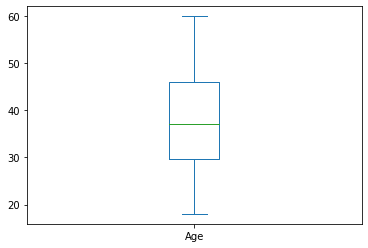

In [11]:
df.Age.plot(kind='box')

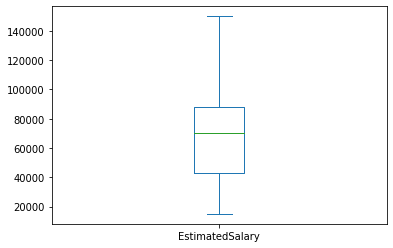

In [26]:
df.EstimatedSalary.plot(kind='box')

In [12]:
#no outliers in our required features

In [13]:
#check corr between Age and Salary

In [27]:
df[['Age','EstimatedSalary','Purchased']].corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [16]:
# Here there estimaed salary and age has correlation with target variable.

**Splitting the dataset into the Training set and Test set**

In [28]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=7)

**Feature Scaling**

In [61]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [62]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()
logReg.fit(x_train, y_train)

LogisticRegression()

**Step 3 | Predection**

In [63]:
logReg.predict_proba(x_test)

array([[0.23312489, 0.76687511],
       [0.98394305, 0.01605695],
       [0.75353948, 0.24646052],
       [0.87426915, 0.12573085],
       [0.42703592, 0.57296408],
       [0.50776981, 0.49223019],
       [0.03229647, 0.96770353],
       [0.74014251, 0.25985749],
       [0.01831916, 0.98168084],
       [0.87267896, 0.12732104],
       [0.99051782, 0.00948218],
       [0.17843459, 0.82156541],
       [0.98393456, 0.01606544],
       [0.09668457, 0.90331543],
       [0.48433112, 0.51566888],
       [0.06509266, 0.93490734],
       [0.69722088, 0.30277912],
       [0.93147539, 0.06852461],
       [0.47488882, 0.52511118],
       [0.21659828, 0.78340172],
       [0.90673546, 0.09326454],
       [0.96339633, 0.03660367],
       [0.52307346, 0.47692654],
       [0.64618301, 0.35381699],
       [0.89712747, 0.10287253],
       [0.8196567 , 0.1803433 ],
       [0.19293293, 0.80706707],
       [0.90714027, 0.09285973],
       [0.83184298, 0.16815702],
       [0.7739135 , 0.2260865 ],
       [0.

In [64]:
y_pred=logReg.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [75]:
res=pd.DataFrame({'Actual Prediction':y_test, 'Model_prediction':y_pred})
res

,Actual Prediction,Model_prediction
265,1,1
65,0,0
120,0,0
132,0,0
378,1,1
...,...,...
221,1,0
59,0,0
362,1,1
74,0,0


In [65]:
from sklearn.metrics import roc_auc_score, confusion_matrix
result=roc_auc_score(y_test, y_pred)
result

0.8675213675213675

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [66]:
conf_mat=confusion_matrix(y_test, y_pred)
conf_mat

array([[48,  6],
       [ 4, 22]])

**Visualization**

In [68]:
%matplotlib inline
import itertools

In [71]:
class_names = ["not_Purchased", "Purchased"]
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=12)
    plt.xlabel('Predicted label', labelpad=12)
    plt.title(title, y=1.02)
    plt.tight_layout()

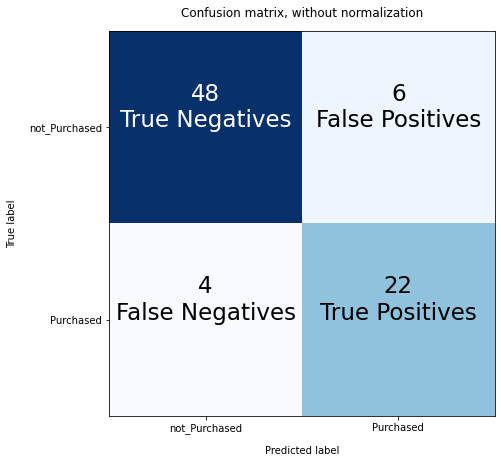

In [72]:
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(conf_mat, classes=class_names, title='Confusion matrix, without normalization')